### DOWLOAD DE BIBLIOTECAS

In [1]:

%pip install -r requirements.txt

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 651.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   -------------- ------------------------- 112.6/302.2 kB 2.2 MB/s eta 0:00:01
   ------------------------ --------------- 184.3/302.2 kB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/302.2 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 302.2/302.2 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB ? eta -:--:--
    ---------

## EXPORTAÇÃO DE BIBLIOTECAS

In [22]:
# trabalhar com dados
import pandas as pd

# separação dos dados do dados para treinamento
from sklearn.model_selection import train_test_split

# avaliação de metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# plotar gráficos
import matplotlib.pyplot as plt

## LEITURA DE DADOS E ORGANIZAÇÃO DOS MESMOS

### Leitura de dados:

In [2]:
dataset = pd.read_csv("palmerpenguins.csv")

### Mostrando como estão os dados antes de serem organizados

In [3]:
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


### Convertendo os valores presentes na coluna 'island' para números inteiros, de acordo com o mapeamento

In [4]:
dataset['island'] = dataset['island'].replace({
    "Biscoe": 0,
    "Dream": 1,
    "Torgersen": 2
})

dataset['sex'] = dataset['sex'].replace({
    "FEMALE": 0,
    "MALE": 1
})

dataset['species'] = dataset['sex'].replace({
    "Adeline": 0,
    "Chinstrap": 1,
    "Gentoo": 2
})

C:\Users\mathe\AppData\Local\Temp\ipykernel_23968\2106351171.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['island'] = dataset['island'].replace({
C:\Users\mathe\AppData\Local\Temp\ipykernel_23968\2106351171.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['sex'] = dataset['sex'].replace({


### Reordenando as colunas do conjunto de dados

In [5]:
new_col_order = ['island', 'sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']
dataset = dataset.reindex(columns=new_col_order)

### Dados após ordenação

In [6]:
dataset.head()

,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,2,1,39.1,18.7,181,3750,1
1,2,0,39.5,17.4,186,3800,0
2,2,0,40.3,18.0,195,3250,0
3,2,0,36.7,19.3,193,3450,0
4,2,1,39.3,20.6,190,3650,1


## REALIZANDO O TREINAMENTO

### Separando o conjunto de dados em duas partes:  80% para treinamento e 20% para testes

In [7]:
X = dataset.drop(columns=['species']) # features
y = dataset['species'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (266, 6)
Tamanho X de teste: (67, 6)
Tamanho y de treino: (266,)
Tamanho y de teste: (67,)


### MODELO DE CLASSIFICAÇÃO ESCOLHIDO É O DECISION TREE (Árvore de Decisão)

In [8]:
# Importação da biblioteca para a criação do modelo de classificação
from sklearn.tree import DecisionTreeClassifier

# instanciando o modelo
tree = DecisionTreeClassifier()

### TREINANDO O MODELO

In [9]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## AVALIAÇÃO DE MODELO

### PREVENDO VALORES

In [38]:
tree_pred = tree.predict(X_test)

### AVALIAÇÃO

In [39]:
tree_ava = classification_report(y_test, tree_pred)
print(tree_ava)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        26

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



### ANALISANDO A ACURÁCIA POR MEIO DE GRÁFICOS

Pontuação de treinamento do modelo: 1.0


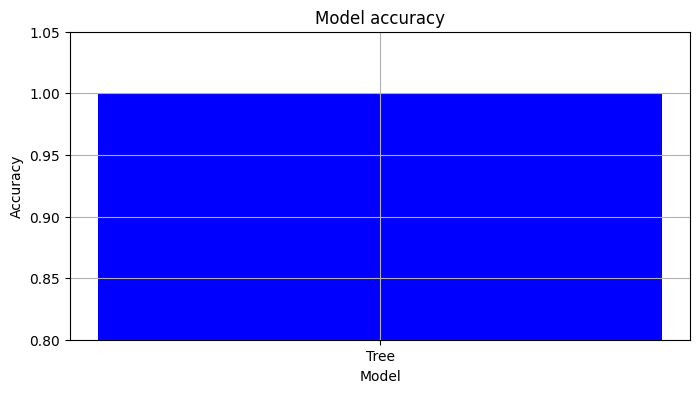

In [40]:
# prevendo valores
tree_predict = tree.predict(X_test)         

# avaliação
tree_score = accuracy_score(y_test, tree_predict)

print(f"Pontuação de treinamento do modelo: {tree_score}")

# gráfico
plt.figure(figsize = (8,4))
plt.title("Model accuracy")
plt.bar(x = [0], height = [tree_score], color = "blue")
plt.xticks([0], ["Tree"])
plt.ylim(0.8,1.05)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid()
plt.show()